# Polynomial Equations
First-Order Polynomial $$ x+7 = 0$$
Second-order Polynomial Equation $$x^2+2x-3 = 0$$


In [ ]:
import numpy as np

In [ ]:
np.roots([1,7])

array([-7.])

In [ ]:
np.roots([1,2,-3])

array([-3.,  1.])

The root of the equation $ x^2+2x-3$ are $x=-3,x=1$

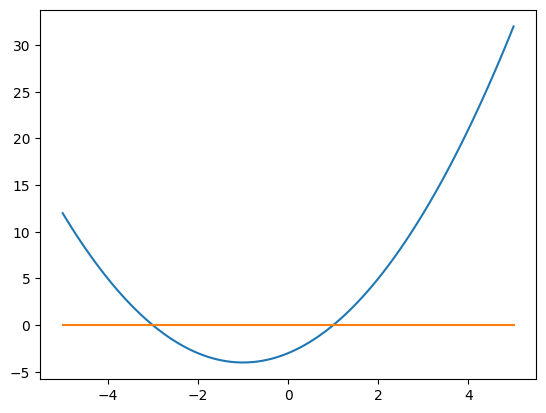

In [ ]:
import matplotlib.pyplot as plt
x = np.linspace(-5,5,100)
y = x**2+2*x-3
fig, ax = plt.subplots()
ax.plot(x,y)
ax.plot(x,0*x)
plt.show()

# Higher Order Polynomial
$$f = x^3-4x^2+x+6 = 0$$


In [ ]:
np.roots([1,-4,1,6])

array([ 3.,  2., -1.])

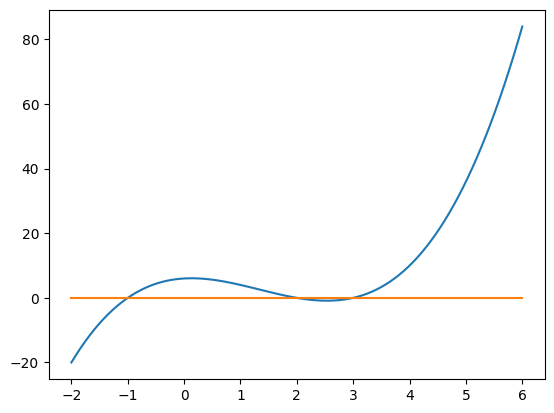

In [ ]:
x = np.linspace(-2,6,100)
y = x**3-4*x**2+x+6
fig, ax = plt.subplots()
ax.plot(x,y)
ax.plot(x,0*x)
plt.show()

`solve()` function from `sympy` package

In [ ]:
from sympy.solvers import solve
from sympy import Symbol
x = Symbol('x')
solve(x**3-4*x**2+x+6)

[-1, 2, 3]

# Transcendental Equations
$$g= \cosh(x)\cos(x)+1 =0$$

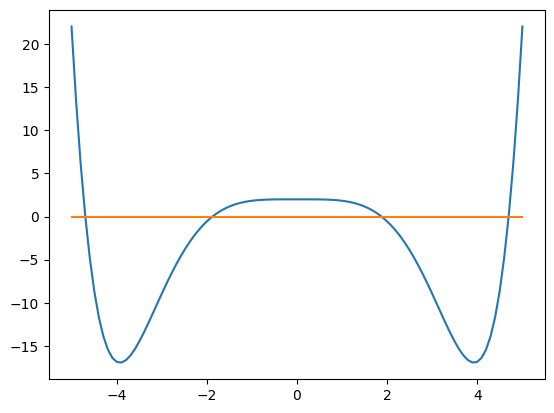

In [ ]:
x = np.linspace(-5,5,100)
y = np.cosh(x)*np.cos(x)+1
fig, ax = plt.subplots()
ax.plot(x,y)
ax.plot(x,0*x)
plt.show()

In [2]:
import scipy.optimize as opt
opt.fsolve(lambda x: np.cosh(x)*np.cos(x)+1,1)

NameError: name 'np' is not defined

$$h=  10\ln(x)-x=0$$

<ipython-input-28-6e07e55dac8e>:1: RuntimeWarning: invalid value encountered in log
  h = lambda x: 10*np.log(x)-x


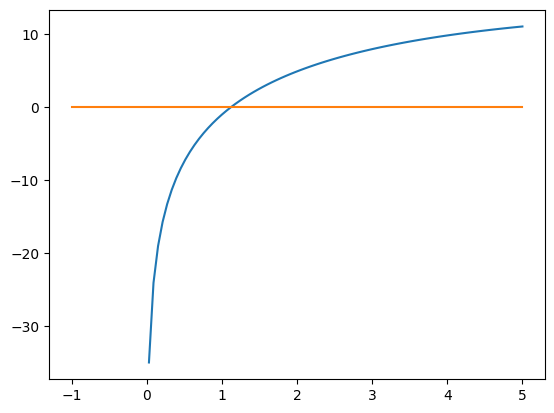

In [ ]:
h = lambda x: 10*np.log(x)-x

fig, ax = plt.subplots()
x = np.linspace(-1,5,100)
y = h(x)
ax.plot(x,y)
ax.plot(x,0*x)
plt.show()

In [ ]:
opt.fsolve(h,1)

array([1.11832559])

# Set of Algebraic Equations
$$\begin{align}
5x - 5y + 2z &= 3 \\
3x + 2y - z &= 4 \\
x - 2y +3z &= 6
\end{align}
$$

---
$$
\begin{bmatrix}
5 & -4 & 2 \\
3 & 2 & -1 \\
1 & -2 & 3
\end{bmatrix}
\begin{Bmatrix}
x \\ y\\ z
\end{Bmatrix}
= \begin{Bmatrix}
3 \\ 4\\ 6
\end{Bmatrix}
$$

In [ ]:
A = np.array([[5,-4, 2],[3,2,-1],[1,-2,3]])
b = np.array([3,4,6])
x = np.linalg.solve(A,b)
x

array([1., 2., 3.])

In [ ]:
import sympy as sym
A = sym.Matrix([[5,-4, 2],[3,2,-1],[1,-2,3]])
B = sym.Matrix([3,4,6])
X = A.LUsolve(B)
print(X)

Matrix([[1], [2], [3]])


## NonLinear Equation
$$ x^2+y = 3 \tag{1}$$
$$ 3x+y^2 = 7 \tag{2} $$

From eq(1) $y = 3-x^2$  
From eq(2) $y = \sqrt{7-3x}$

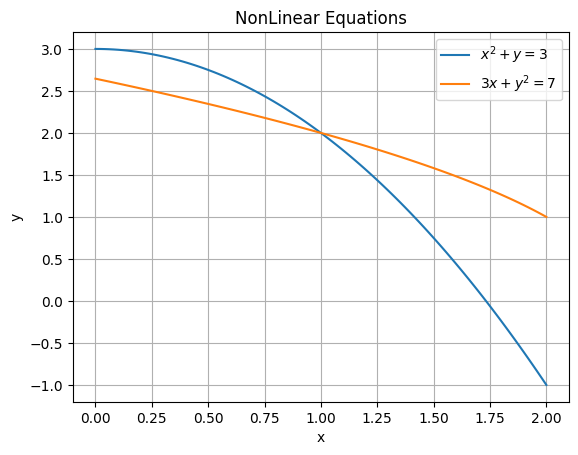

In [ ]:
x = np.linspace(0,2,100)
y1 = 3-x**2
y2 = np.sqrt(7-3*x)
fig, ax = plt.subplots()
ax.plot(x,y1,label=r'$x^2 + y = 3$')
ax.plot(x,y2,label=r'$3x + y^2 = 7$')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('NonLinear Equations')
ax.legend()
ax.grid(True)

In [3]:
from scipy.optimize import fsolve
def equations(p):
  x,y = p
  return (x**2+y-3,3*x+y**2-7)
x,y = fsolve(equations,(1,1))
print(x,y)

1.0000000000095106 2.0000000000164033


## Newton-Raphson method
$$f_1 =  x^2+ y - 3 \\ f_2 = 3x + y^2 - 7 $$


$$[J]\{ΔX\} = -\{F\}$$
Where $[J]$ is Jacobian matrix which is derived form the derivatives of the functions $f_1$ and $f_2$
$$
[J] = \begin{bmatrix}
\frac{\partial f_1}{\partial x} & \frac{\partial f_1}{\partial y} \\
\frac{\partial f_2}{\partial x} & \frac{\partial f_2}{\partial y}
 \end{bmatrix}
 = \begin{bmatrix}
 2x & 1 \\ 3 & 2y
 \end{bmatrix} \\
\{F\} = \begin{Bmatrix}
x^2+ y - 3 \\ 3x + y^2 - 7
\end{Bmatrix}
$$
Therefore
$$
\begin{bmatrix} 2x & 1 \\ 3 & 2y \end{bmatrix}
\begin{Bmatrix} \Delta x \\ \Delta y \end{Bmatrix}
 = \begin{Bmatrix} x^2+ y - 3 \\ 3x + y^2 - 7 \end{Bmatrix}
$$

2. Compute $\Delta X$, then $\{X\}^{k+1} = \{X\}^k+ \{\Delta X\}^{k+1}$

In [5]:
import numpy as np
tol = 0.0001
X = np.zeros((2,1))
DX = np.zeros((2,1))
J = np.zeros((2,2))
F = np.zeros((2,1))

for i in range(1,100):
  J[0][0] = 2*X[0]
  J[0][1] = 1
  J[1][0] = 3
  J[1][1] = 2*X[1]

  F[0] = X[0]**2+X[1]-3
  F[1] = 3*X[0]+X[1]**2-7

  DX = np.linalg.solve(J,-F)
  X = X+DX
  print(i,X[0],X[1])
  dx = np.min(DX)
  dx = np.abs(dx)
  if dx<tol:
    break

1 [2.33333333] [3.]
2 [1.38666667] [1.97333333]
3 [1.07417597] [1.94379642]
4 [1.00340644] [1.99818384]
5 [1.00000858] [1.99999438]
6 [1.] [2.]


<ipython-input-5-c61ce99b8ad2>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J[0][0] = 2*X[0]
<ipython-input-5-c61ce99b8ad2>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J[1][1] = 2*X[1]
